<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Basis Statistiek Bayes / SQL</h1>
<img src='pics/sqlite.gif'/>

<h2>Environment Variables</h2>

In [2]:
import os
os.environ['export PYSPARK_DRIVER_PYTHON'] = 'jupyter'
os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] ='notebook'
os.environ['PYARROW_IGNORE_TIMEZONE'] = '1'

<h2>Imports<h2>

In [3]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3
from PIL import Image
import pandas as pd
import sqlite3

<h2>Extract, Transform and Load</h2>

<h3>Extract</h3>

In [4]:
# https://raw.githubusercontent.com/ajturner/acetate/master/places/Countries-Europe.csv
eurCsvFile = "csv/csv//countries_europe.csv"
euCsvFile = "csv/csv/european_union.csv"

 # Create Pandas DataFrames
eurDF = pd.read_csv(eurCsvFile)
euDF = pd.read_csv(euCsvFile)
print(eurDF)
# print(euDF)

    zoom                    name  abbreviation Code  ISO numeric  \
0      3                 Ukraine          Ukr.  UKR          804   
1      3                  France           Fr.  FRA          250   
2      3                   Spain         Spain  ESP          724   
3      3                  Sweden          Swe.  SWE          752   
4      3                 Germany          Ger.  DEU          276   
5      3                 Finland          Fin.  FIN          246   
6      3                  Norway          Nor.  NOR          578   
7      3                  Poland          Pol.  POL          616   
8      3                   Italy         Italy  ITA          380   
9      3          United Kingdom          U.K.  GBR          826   
10     3                 Romania          Rom.  ROU          642   
11     3                 Belarus         Bela.  BLR          112   
12     3                  Greece          Grc.  GRC          300   
13     3                Bulgaria          Blg.  

<h3>Transform</h3>

<h3>Exercise 1</h3>
<h4>Gegeven</h4>

In [17]:
benelux = {"Belgium", "Netherlands", "Luxembourg"}
nordics = {"Denmark", "Finland", "Iceland", "Norway"}
baltics = {"Estonia", "Latvia", "Lithuania"}

<h4>Gevraagd</h4>
<ol>
    <li>Voeg de kolom <u>group</u> toe aan de dataset <u>eurDF</u> met daarin de groep waartoe een land behoort volgens bovenstaande sets</li>
    <li>Ga na of er nog meer landengroepen zijn binnen Europa en voeg die ook toe</li>
    <li>Sla deze verrijkte dataset op in een nieuw CSV bestand</li>
</ol>

<h4>Oplossing</h4>

In [18]:
df = eurDF

In [39]:
import pandas as pd 

# initialize list of lists 
# Create the pandas DataFrame 
df['Group'] = [
    'Benelux' if x == "Netherlands" or x == "Belgium" or x == "Luxembourg" 
    else 'Nordics' if x == "Denmark" or x == "Finland" or x == "Iceland" or x == "Norway" or x == "Sweden"
    else 'Baltics' if x == "Estonia" or x == "Latvia" or x == "Lithuania"  
    else ' ' for x in df['name']]
df


,zoom,name,abbreviation,Code,ISO numeric,land area km,population,latitude,longitude,continent,Group
0,3,Ukraine,Ukr.,UKR,804,603700.0,45415596,49.00,32.00,eu,
1,3,France,Fr.,FRA,250,547030.0,64768389,46.00,2.00,eu,
2,3,Spain,Spain,ESP,724,504782.0,46505963,40.00,-4.00,eu,
3,3,Sweden,Swe.,SWE,752,449964.0,9045000,62.00,15.00,eu,Nordics
4,3,Germany,Ger.,DEU,276,357021.0,82369000,51.50,10.50,eu,
5,3,Finland,Fin.,FIN,246,337030.0,5244000,64.00,26.00,eu,Nordics
6,3,Norway,Nor.,NOR,578,324220.0,4907000,62.00,10.00,eu,Nordics
7,3,Poland,Pol.,POL,616,312685.0,38500000,52.00,20.00,eu,
8,3,Italy,Italy,ITA,380,301230.0,58145000,42.83,12.83,eu,
9,3,United Kingdom,U.K.,GBR,826,244820.0,62348447,54.90,-3.12,eu,


In [46]:
df.to_csv('csv/csv/eurDF.csv', index=False)

<h2>SQLite</h2>

<h3>Load</h3>

<p>Maak een lege database</p>

In [50]:
!sqlite3 ../db/europe.db "VACUUM;"

'sqlite3' is not recognized as an internal or external command,
operable program or batch file.


In [52]:
# Connect to SQLite database
dbConnection = sqlite3.connect('db/europe.db')

<p>Maak tabellen o.b.v. de dataset</p>

In [53]:
eurDF.to_sql('countries', dbConnection, if_exists='replace', index = False)
euDF.to_sql('eu', dbConnection, if_exists='replace', index = False)

27

In [54]:
dbCursor = dbConnection.cursor()

query = """
    SELECT *
    FROM countries
    INNER JOIN eu
    ON countries.Code = eu.Code
    LIMIT 10
"""

result = dbCursor.execute(query).fetchall()
print(result)
print(type(result))

[(3, 'France', 'Fr.', 'FRA', 250, 547030.0, 64768389, 46.0, 2.0, 'eu', ' ', 'FRA', 'France', '1958-01-01'), (3, 'Spain', 'Spain', 'ESP', 724, 504782.0, 46505963, 40.0, -4.0, 'eu', ' ', 'ESP', 'Spain', '1986-01-01'), (3, 'Sweden', 'Swe.', 'SWE', 752, 449964.0, 9045000, 62.0, 15.0, 'eu', 'Nordics', 'SWE', 'Sweden', '1995-01-01'), (3, 'Germany', 'Ger.', 'DEU', 276, 357021.0, 82369000, 51.5, 10.5, 'eu', ' ', 'DEU', 'Germany', '1958-01-01'), (3, 'Finland', 'Fin.', 'FIN', 246, 337030.0, 5244000, 64.0, 26.0, 'eu', 'Nordics', 'FIN', 'Finland', '1995-01-01'), (3, 'Poland', 'Pol.', 'POL', 616, 312685.0, 38500000, 52.0, 20.0, 'eu', ' ', 'POL', 'Poland', '2004-05-01'), (3, 'Italy', 'Italy', 'ITA', 380, 301230.0, 58145000, 42.83, 12.83, 'eu', ' ', 'ITA', 'Italy', '1958-01-01'), (3, 'Romania', 'Rom.', 'ROU', 642, 237500.0, 21959278, 46.0, 25.0, 'eu', ' ', 'ROU', 'Romania', '2007-01-01'), (3, 'Greece', 'Grc.', 'GRC', 300, 131940.0, 11000000, 39.0, 22.0, 'eu', ' ', 'GRC', 'Greece', '1981-01-01'), (3, 

In [55]:
countriesQuery = """
    SELECT *
    FROM countries
    LIMIT 10
"""

In [56]:
result = dbCursor.execute(countriesQuery).fetchall()
print(result)

[(3, 'Ukraine', 'Ukr.', 'UKR', 804, 603700.0, 45415596, 49.0, 32.0, 'eu', ' '), (3, 'France', 'Fr.', 'FRA', 250, 547030.0, 64768389, 46.0, 2.0, 'eu', ' '), (3, 'Spain', 'Spain', 'ESP', 724, 504782.0, 46505963, 40.0, -4.0, 'eu', ' '), (3, 'Sweden', 'Swe.', 'SWE', 752, 449964.0, 9045000, 62.0, 15.0, 'eu', 'Nordics'), (3, 'Germany', 'Ger.', 'DEU', 276, 357021.0, 82369000, 51.5, 10.5, 'eu', ' '), (3, 'Finland', 'Fin.', 'FIN', 246, 337030.0, 5244000, 64.0, 26.0, 'eu', 'Nordics'), (3, 'Norway', 'Nor.', 'NOR', 578, 324220.0, 4907000, 62.0, 10.0, 'eu', 'Nordics'), (3, 'Poland', 'Pol.', 'POL', 616, 312685.0, 38500000, 52.0, 20.0, 'eu', ' '), (3, 'Italy', 'Italy', 'ITA', 380, 301230.0, 58145000, 42.83, 12.83, 'eu', ' '), (3, 'United Kingdom', 'U.K.', 'GBR', 826, 244820.0, 62348447, 54.9, -3.12, 'eu', ' ')]


<h2>Afhankelijke en onafhankelijke variabelen</h2>

<h3>Overlappende uitkomsten</h3>

In [57]:
eu = {"Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "The Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"}

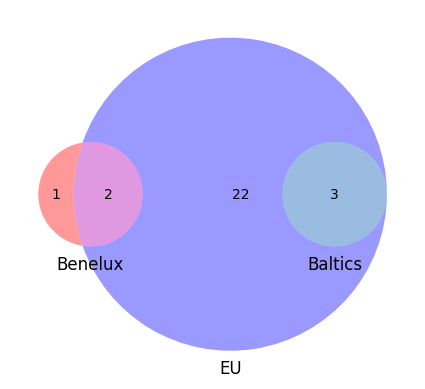

In [61]:
venn3([benelux, baltics, eu], ('Benelux', 'Baltics', 'EU'))

<h3>Exercise 2</h3>
<p>
    Gebruik SQL queries voor het verkrijgen van
<ol>
    <li>P(Nordics); de kans dat een land onderdeel is van de Nordics</li>
    <li><u>P(EU)</u>; de kans dat een Europees land lid is van de Europese Unie</li>
    <li><u>P(EU and Nordics)</u>; de kans dat een land onderdeel is van de Norics en lid is van de EU</li>
</ol>
</p>

In [74]:
# Oplossing
# P(Nordics) = frequency of EU landen in Nordics / Alle mogelijkheden



In [75]:
# Close connection to SQLite database
dbConnection.close()